### Inicio Spark Session
En esta primera celda importamos y configuramos todo lo necesario e iniciamos nuestra sesión de Spark

In [1]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._


//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//Circe para trabajar con JSON
import $ivy.`com.softwaremill.sttp.client::async-http-client-backend-monix:2.0.0-RC2`
import sttp.client.quick.{quickRequest, UriContext, backend}
import sttp.client.asynchttpclient.monix._


//Sttp para realizar request
import $ivy.`com.softwaremill.sttp.client::async-http-client-backend-monix:2.0.0-RC2`
import sttp.client.quick.{quickRequest, UriContext, backend}
import sttp.client.asynchttpclient.monix._
import sttp.client.basicRequest

//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.7.1`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
    .master("local[*]")
    .getOrCreate()
}
import spark.implicits._

Loading spark-stubs
Getting spark JARs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

import $ivy.$                                  



import org.apache.spark.sql._

import org.apache.spark.sql.functions._


//Reducir numero logs

import org.apache.log4j.{Level, Logger}

import $ivy.$                                                                        

import sttp.client.quick.{quickRequest, UriContext, backend}

import sttp.client.asynchttpclient.monix._


//Sttp para realizar request

import $ivy.$                                                                        

import sttp.client.quick.{quickRequest, UriContext, backend}

import sttp.client.asynchttpclient.monix._

import sttp.client.basicRequest

//For adding extra dependenies

import $ivy.$                               

//Plotly

import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

//Iniciamos session de Spark

spark: SparkSession = org.apache.spark.sql.SparkSession@68f3cda4
import spark.implicits._

In [11]:
val dfConsulta3 = spark.read
            .parquet("../../data/parquet/DatosConsulta3.parquet")
            .filter($"Region" !== "Peninsular")

parquet at cmd10.sc:2

1 / 1

dfConsulta3: DataFrame = [Region: string, Energía_Total_por_Region_millones_MWh: double ... 2 more fields]

In [12]:
//Quitar peninsular para quedarnos solo con comunidades
val dataRegiones = dfConsulta3
    .filter($"Region" !== "Peninsular")
    //.filter($"Compuesto" === false) //Fuente unica, no suma de energias

dataRegiones: Dataset[Row] = [Region: string, Energía_Total_por_Region_millones_MWh: double ... 2 more fields]

In [13]:
dataRegiones.show()

show at cmd12.sc:1

1 / 1

+--------------------+-------------------------------------+------------------------------+-------------------------------------------+
|              Region|Energía_Total_por_Region_millones_MWh|Fuente_de_Energía_Predominante|Energía_de_Fuente_Predominante_millones_MWh|
+--------------------+-------------------------------------+------------------------------+-------------------------------------------+
|            Cataluña|                                25.56|                       Nuclear|                                      15.46|
|         Extremadura|                                22.08|                       Nuclear|                                      10.02|
|           Andalucía|                                20.95|            Solar fotovoltaica|                                       7.48|
|  Castilla la Mancha|                                 20.8|            Solar fotovoltaica|                                       7.95|
|     Castilla y Leon|                          

collect at cmd14.sc:4

1 / 1

collect at cmd14.sc:5

1 / 1

collect at cmd14.sc:6

1 / 1

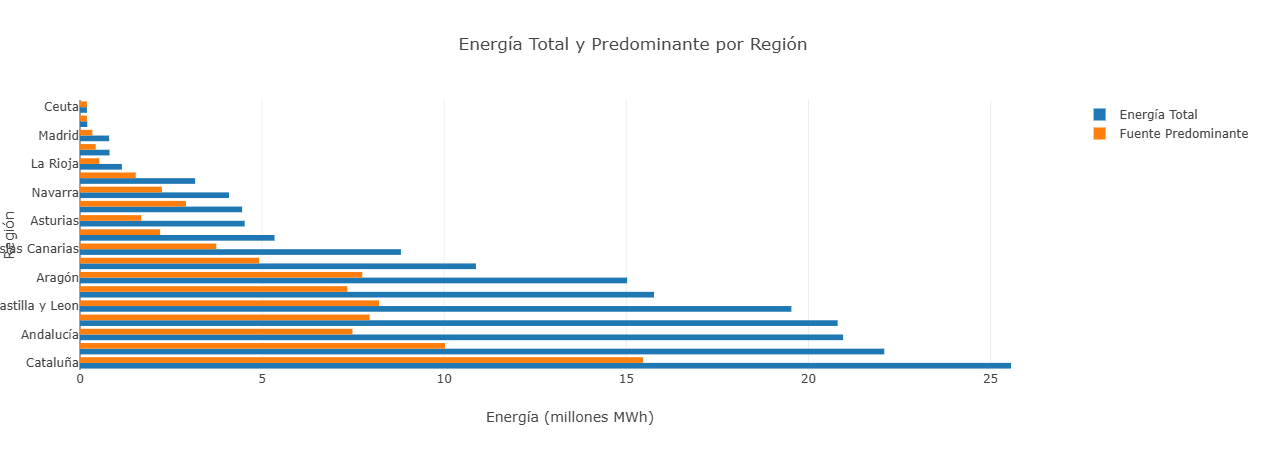

defined function graficoTopRegiones

In [15]:
def graficoTopRegiones(datosConsulta3: DataFrame): Unit = {
    
    // Extraer los datos del DataFrame
    val regiones = datosConsulta3.select("Region").as[String].collect.toSeq
    val energiaTotal = datosConsulta3.select("Energía_Total_por_Region_millones_MWh").as[Double].collect.toSeq
    val energiaPredominante = datosConsulta3.select("Energía_de_Fuente_Predominante_millones_MWh").as[Double].collect.toSeq

    // Traza para la energía total
    val traceTotal = Bar(
      x = energiaTotal,
      y = regiones,
      name = "Energía Total",
      orientation = Orientation.Horizontal
    )

    // Traza para la energía predominante
    val tracePredominante = Bar(
      x = energiaPredominante,
      y = regiones,
      name = "Fuente Predominante",
      orientation = Orientation.Horizontal
    )

    // Configuración del diseño del gráfico
    val layout = Layout(
      title = "Energía Total y Predominante por Región",
      barmode = BarMode.Group,
      xaxis = Axis(title = "Energía (millones MWh)"),
      yaxis = Axis(title = "Región")
    )

    // Renderizar el gráfico
    plot(Seq(traceTotal, tracePredominante), layout)
}

graficoTopRegiones(dataRegiones)